## Denoising Autoencoder

train images shape =  (60000, 28, 28)
test images shape =  (10000, 28, 28)


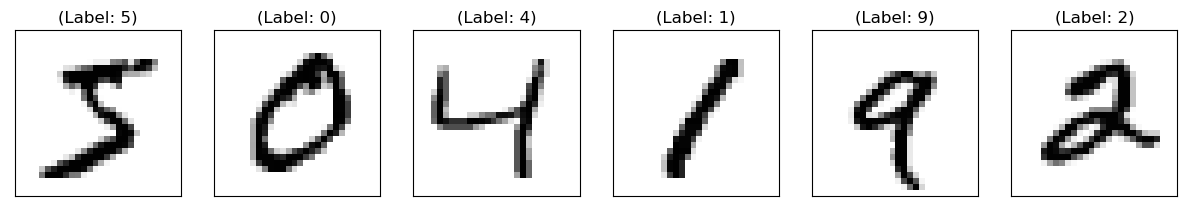

In [1]:
# Importing necessary libraries
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train images shape = ", train_images.shape)
print("test images shape = ", test_images.shape)

# Displaying some of the images 
n = 6  # number of images to display
plt.figure(figsize=(15, 3))
for i in range(n):
    # display original image
    ax = plt.subplot(1, 6, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap= plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    label = str(train_labels[i])
    plt.title("(Label: "+ label + ")")

plt.show()


In [2]:
# Normalizing the pixel values after converting them into floats
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshaping the dataset
train_images = np.reshape(train_images, (train_images.shape[0], 28, 28, 1))
test_images = np.reshape(test_images, (test_images.shape[0], 28, 28, 1))


train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

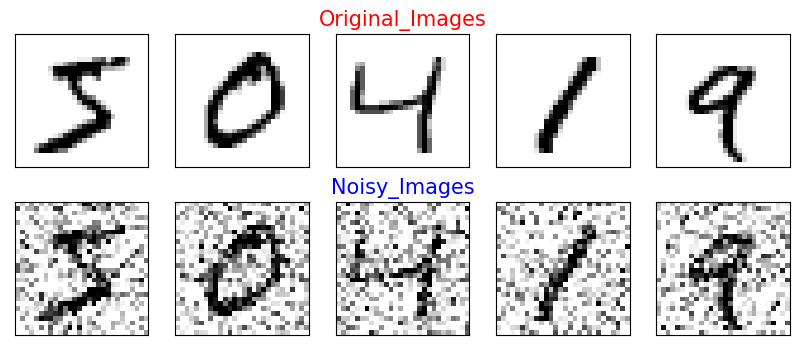

In [12]:
# Adding noise to the images
noise_factor = 0.4
train_noisy_images = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_noisy_images = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

# Clip pixel values to be between 0 and 1
train_noisy_images = np.clip(train_noisy_images, 0.0, 1.0)
test_noisy_images = np.clip(test_noisy_images, 0.0, 1.0)

# display original and noisy images side by side
n = 5  # number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap= plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2:
        plt.title('Original_Images', color = 'Red', fontsize = 15)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_noisy_images[i].reshape(28,28), cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 2:
        plt.title('Noisy_Images', color = 'Blue', fontsize = 15)

plt.show()

In [14]:
# Encoder network
input_img = Input(shape=(28, 28, 1))
encoder = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
encoder = MaxPooling2D(2,2, padding='same')(encoder)
encoder = Conv2D(32, (3,3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D(2,2, padding='same')(encoder)
encoded = Conv2D(64, (3,3), activation='relu', padding='same')(encoder)

# Decoder netowork
decoder = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoder = UpSampling2D((2, 2))(encoded)
decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(decoder)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          1849

In [15]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 0.001)
# LOSS = 'mean_squared_error'
# model.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

# Train the model
autoencoder.fit(train_noisy_images, train_images, epochs=3, batch_size=128, validation_data=(test_noisy_images, test_images))

Epoch 1/3
469/469 [==============================] - 203s 428ms/step - loss: 0.1484 - accuracy: 0.8084 - val_loss: 0.1010 - val_accuracy: 0.8127
Epoch 2/3
469/469 [==============================] - 204s 436ms/step - loss: 0.0964 - accuracy: 0.8135 - val_loss: 0.0927 - val_accuracy: 0.8129
Epoch 3/3
469/469 [==============================] - 201s 429ms/step - loss: 0.0924 - accuracy: 0.8139 - val_loss: 0.0902 - val_accuracy: 0.8132


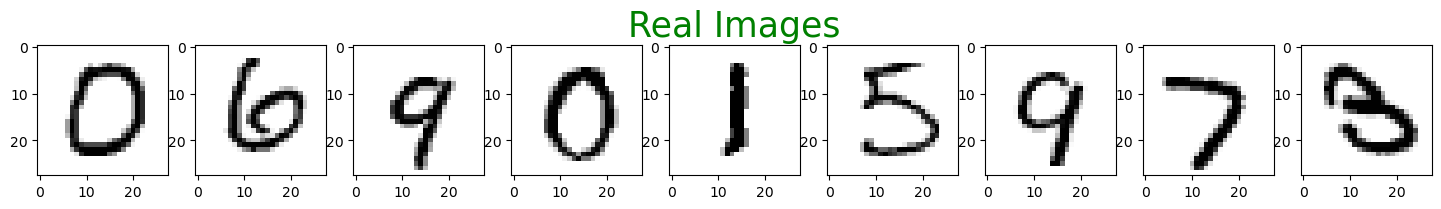

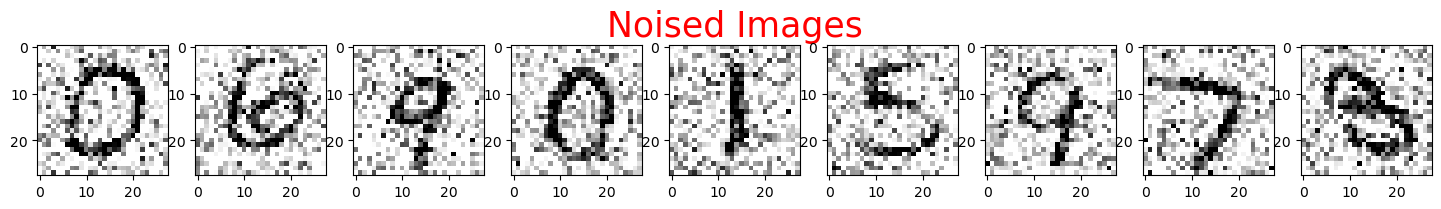

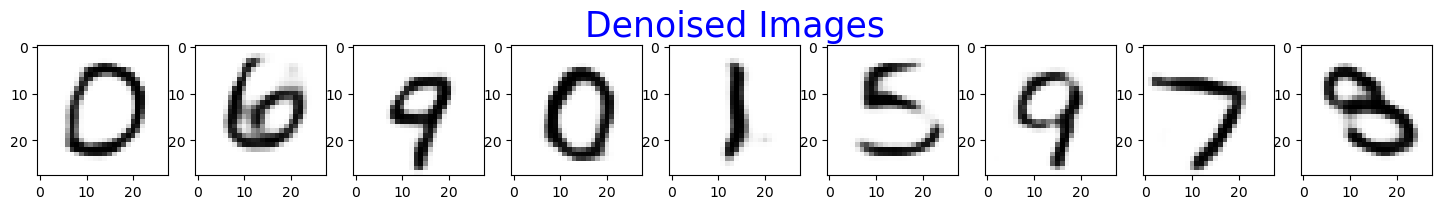

In [17]:
# predict on some input images
decoded_images = autoencoder.predict(test_noisy_images , verbose = 0)

plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images', fontsize = 25, color = 'Green') 
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images', fontsize = 25, color = 'red') 
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):  
    if(i == 15):
        plt.title('Denoised Images', fontsize = 25, color = 'Blue') 
    
    plt.subplot(9,9,i)
    plt.imshow(decoded_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary) 
plt.show()